# NetworkX Tutorial

In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Create graph object 

In [2]:
# create standard empty graph
G = nx.Graph()

In [3]:
# create standard empty directed graph
G = nx.DiGraph()

## Loading graph data from file

In [4]:
# Read an un-directed graph from a list of edges
G = nx.read_edgelist('edgelist1.txt', nodetype=str, data=[('weight', int)])

In [5]:
G.edges

EdgeView([('a', 'b'), ('a', 'd'), ('b', 'c'), ('b', 'e'), ('b', 'd'), ('c', 'd'), ('d', 'e')])

In [6]:
# read adj matrix
data = np.loadtxt('adjmat1.txt')
data

array([[0., 0., 1., 0., 1.],
       [0., 0., 1., 0., 1.],
       [1., 1., 0., 1., 1.],
       [0., 0., 1., 0., 1.],
       [1., 1., 1., 1., 0.]])

In [7]:
G = nx.from_numpy_array(data)

In [8]:
G.edges

EdgeView([(0, 2), (0, 4), (1, 2), (1, 4), (2, 3), (2, 4), (3, 4)])

## Output basic stats of graph

In [9]:
G.number_of_nodes()

5

In [10]:
G.number_of_edges()

7

In [11]:
G.nodes(data=True)

NodeDataView({0: {}, 1: {}, 2: {}, 3: {}, 4: {}})

In [12]:
G.edges(data=True)

EdgeDataView([(0, 2, {'weight': 1.0}), (0, 4, {'weight': 1.0}), (1, 2, {'weight': 1.0}), (1, 4, {'weight': 1.0}), (2, 3, {'weight': 1.0}), (2, 4, {'weight': 1.0}), (3, 4, {'weight': 1.0})])

## Adding node and edge attributes 

In [13]:
# Adding a label to certain nodes
G.nodes[0]['label'] = 'class1'
G.nodes[1]['label'] = 'class2'
G.nodes(data=True)

NodeDataView({0: {'label': 'class1'}, 1: {'label': 'class2'}, 2: {}, 3: {}, 4: {}})

In [14]:
G.edges[(0,2)]['weight'] = 2.0
G.edges[(3,4)]['weight'] = 10
G.edges(data=True)

EdgeDataView([(0, 2, {'weight': 2.0}), (0, 4, {'weight': 1.0}), (1, 2, {'weight': 1.0}), (1, 4, {'weight': 1.0}), (2, 3, {'weight': 1.0}), (2, 4, {'weight': 1.0}), (3, 4, {'weight': 10})])

## Plotting network 

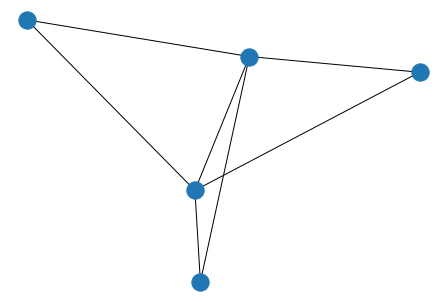

In [15]:
# basic drawing of network
nx.draw(G)

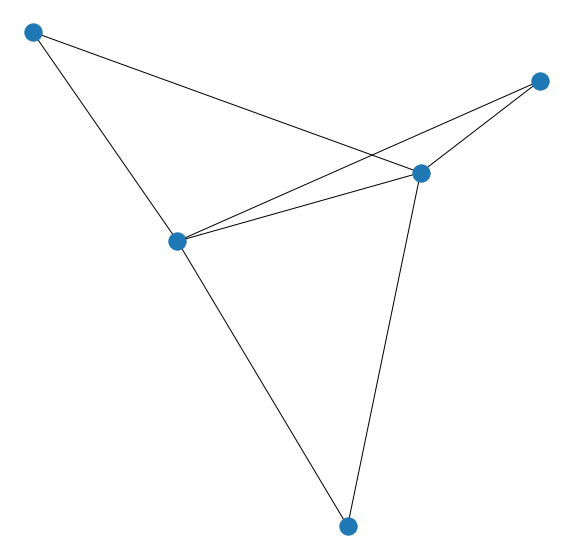

In [16]:
# Make the plot bigger
plt.subplots(figsize=(10,10))
nx.draw(G)

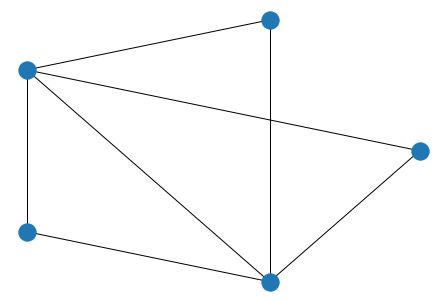

In [17]:
# set layout
pos = nx.circular_layout(G)
nx.draw(G,pos=pos)

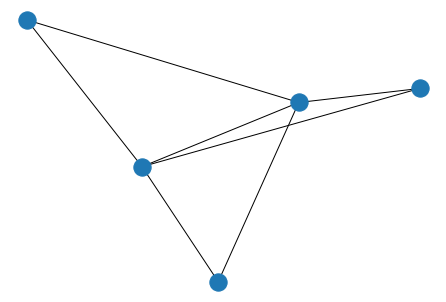

In [18]:
pos = nx.spring_layout(G)
nx.draw(G,pos=pos)

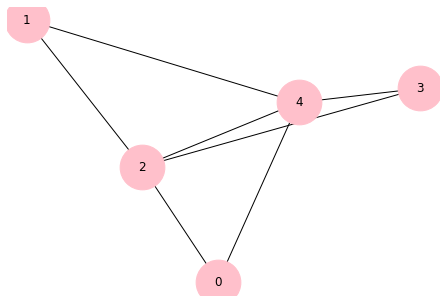

In [19]:
# change node size, with labels and change node colour
nx.draw(G,pos=pos,node_size=2000,with_labels = True,node_color='pink')

Text(0.5, 1.0, 'Changing the node size according to some measure')

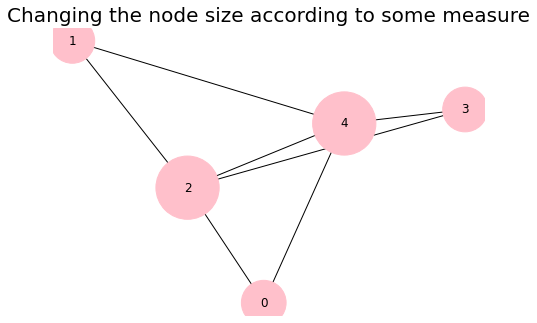

In [20]:
# get the degree
deg = G.degree()

# Multiply the node degree to 1000 as the node size 
deg = [int(deg[node])*1000 for node in G.nodes()]
nx.draw(G,pos=pos,node_size = deg,with_labels = True,node_color='pink')

plt.title('Changing the node size according to some measure',fontsize=20)

# Example on karate club

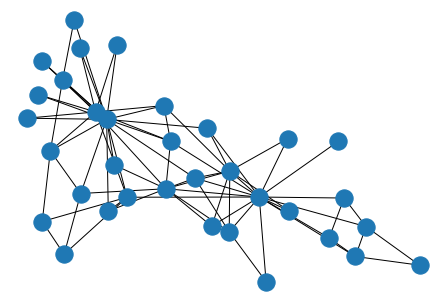

In [21]:
g = nx.karate_club_graph()
pos = nx.spring_layout(g)
nx.draw(g,pos)

In [22]:
for edge in g.edges:
    source = edge[0]
    target = edge[1]
    
    # creating random edge weights and colours
    weight = np.random.rand()*10
    color = np.random.rand()*10
    
    g[source][target]['weight'] = weight
    g[source][target]['color'] = color

In [23]:
edges = g.edges()
weights = [g[u][v]['weight'] for u,v in edges]
colors = [g[u][v]['color'] for u,v in edges]

In [24]:
node_community = list(nx.get_node_attributes(g,'club').values())
# disgusting list comprehension to binarise community labels
node_community_id = [0 if label=='Mr. Hi' else 1 for label in node_community ]

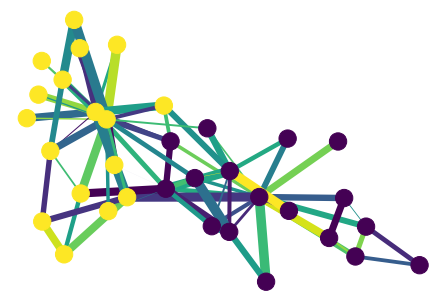

In [25]:
nx.draw(g,pos,edges=edges,edge_color=colors,width=weights,node_color=node_community_id)

## Other functionality 

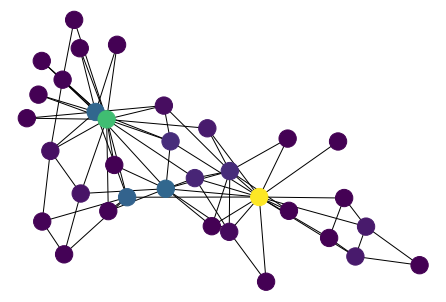

In [26]:
betweenness_centrality = list(nx.centrality.betweenness_centrality(g).values())
nx.draw(g,pos,edges=edges,node_color=betweenness_centrality)

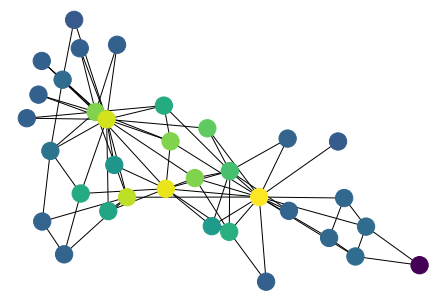

In [27]:
closeness_centrality = list(nx.centrality.closeness_centrality(g).values())
nx.draw(g,pos,edges=edges,node_color=closeness_centrality)

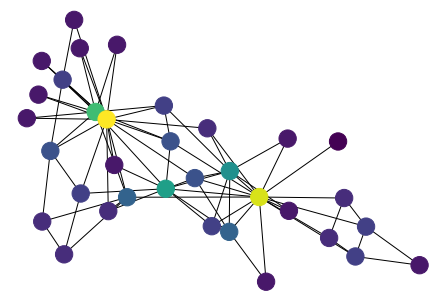

In [28]:
degree_centrality = list(nx.centrality.degree_centrality(g).values())
nx.draw(g,pos,edges=edges,node_color=degree_centrality)